───────────────────────────
ESERCIZIO 1
───────────────────────────

Crea un array NumPy con le temperature massime (in °C) registrate in una settimana:
25.5, 27.0, 29.1, 26.8, 30.5, 31.2, 28.4.

• Calcola la temperatura media della settimana.  
• Seleziona i giorni in cui la temperatura è stata superiore alla media.  
• Crea un nuovo array contenente le temperature superiori alla media convertite in °F.  
  Formula:  F = C × 9/5 + 32


In [3]:
import numpy as np
maxTemp = np.array([25.5,27.0,29.1,26.8,30.5,31.2,28.4])

meanTemp = np.mean(maxTemp)
print("Mean Maximum Temperature:", meanTemp)

daysOVerMean = maxTemp[maxTemp > meanTemp]
print("Days with Maximum Temperature Over Mean:", daysOVerMean)

cToF = daysOVerMean * 9/5 + 32
print("Days with Maximum Temperature Over Mean in Fahrenheit:", cToF)

Mean Maximum Temperature: 28.357142857142854
Days with Maximum Temperature Over Mean: [29.1 30.5 31.2 28.4]
Days with Maximum Temperature Over Mean in Fahrenheit: [84.38 86.9  88.16 83.12]


Esercizio 2
Simula 1200 lanci di un dado a 6 facce truccato. La probabilità di ottenere '6' è del 25%, mentre le altre facce (1, 2, 3, 4, 5) hanno la stessa probabilità di uscire.

Crea un array NumPy contenente i risultati dei 1200 lanci.

Calcola la proporzione cumulativa di '6' ottenuti ogni 100 lanci (es. dopo 100 lanci, 200, 300, ..., fino a 1200).

Crea un grafico a linee che mostri l'andamento di questa proporzione cumulativa.

Cumulative Sum of Rolls: [   3    9   14 ... 4480 4485 4486]
Proporzione di punti accumulati ogni 100 lanci: [3.59       3.67       3.73333333 3.7325     3.744      3.77166667
 3.70571429 3.7325     3.70333333 3.684      3.70727273 3.73833333]


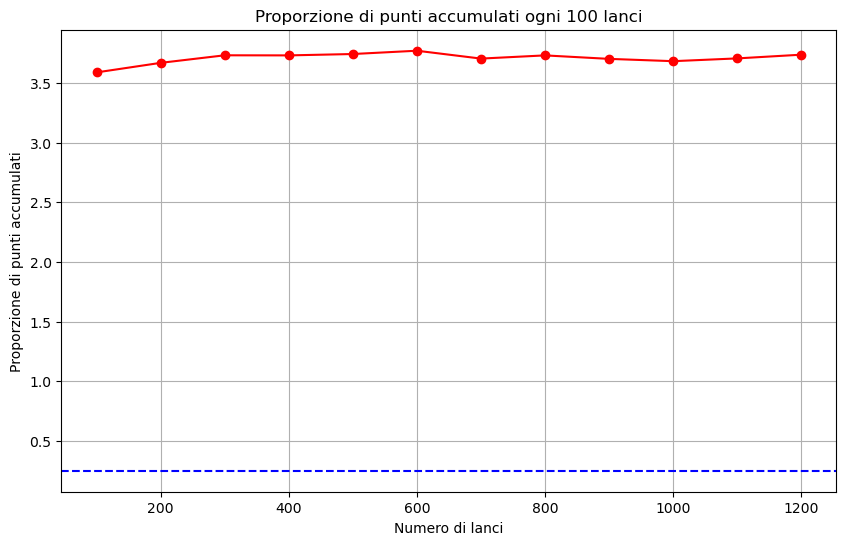

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate 1200 rolls of a rigged die (6 has 25% probability)
lanci = np.random.choice([1,2,3,4,5,6], size=1200, p=[0.15,0.15,0.15,0.15,0.15,0.25])

cumSumLanci = np.cumsum(lanci)
print("Cumulative Sum of Rolls:", cumSumLanci)
punti = np.arange(100, 1200+1, 100)

proporzione = cumSumLanci[punti -1 ] / punti

print("Proporzione di punti accumulati ogni 100 lanci:", proporzione)



plt.figure(figsize=(10, 6))
plt.plot(punti, proporzione, marker='o', linestyle='-', color='r')
plt.axhline(y=0.25, color='b', linestyle='--', label='Proporzione 0.5')
plt.title('Proporzione di punti accumulati ogni 100 lanci')
plt.xlabel('Numero di lanci')
plt.ylabel('Proporzione di punti accumulati')
plt.grid(True)
plt.show()


───────────────────────────
ESERCIZIO 3
───────────────────────────

Scrivi la funzione min_max_scaler(matrix) che scala una matrice NumPy nell’intervallo [0, 1].

• Trova min e max globali della matrice.  
• Applica a ogni elemento x:  x_scaled = (x − min) / (max − min)  
• Restituisci la matrice scalata.  
• Testa la funzione con un array 5 × 8 di interi casuali tra –10 e 50.


In [16]:
def min_max_scaler(matrix):
    max = np.max(matrix, axis=0)
    min = np.min(matrix, axis=0)
    return (matrix - min) / (max - min)


# Example usage of min_max_scaler
np.random.seed(42)
matrix = np.random.randint(-10,50, size=(5,8))
print("Original Matrix:\n", matrix)
scaled_matrix = min_max_scaler(matrix)
print("Scaled Matrix:\n", scaled_matrix)

Original Matrix:
 [[28 41 18  4 32 -3 10 28]
 [47  8 12  0  0 13 42 25]
 [29 13 -8 11 42 -9 13 33]
 [19 27 -9 49 10 22  1 47]
 [11 33 14 38 16 48 31 17]]
Scaled Matrix:
 [[0.47222222 1.         1.         0.08163265 0.76190476 0.10526316
  0.2195122  0.36666667]
 [1.         0.         0.77777778 0.         0.         0.38596491
  1.         0.26666667]
 [0.5        0.15151515 0.03703704 0.2244898  1.         0.
  0.29268293 0.53333333]
 [0.22222222 0.57575758 0.         1.         0.23809524 0.54385965
  0.         1.        ]
 [0.         0.75757576 0.85185185 0.7755102  0.38095238 1.
  0.73170732 0.        ]]


───────────────────────────
ESERCIZIO 4  –  videogames.csv
───────────────────────────
1. Aggiungi la colonna popularity_score:
   popularity_score = user_score × log10(1 + global_sales_millions)

2. Trova il videogioco con il popularity_score massimo.  
3. Filtra i giochi di genere "RPG" con user_score > 9.0.  
4. Grafico a barre orizzontali dei 10 giochi con popularity_score più alto.  
5. Scatter plot di user_score (y) vs global_sales_millions (x).


DataFrame Shape: (100, 5)
             title     genre  release_year  user_score  global_sales_millions
0  Epic Quest Saga       RPG          2018         9.8                  85.60
1           Game_1  Strategy          2017         8.6                   1.86
2           Game_2    Action          2013         8.4                   1.48
3           Game_3    Action          2018         9.7                   3.15
4           Game_4       RPG          2013         8.2                   1.23
Top  Popular Games:
               title     genre  release_year  user_score  \
0   Epic Quest Saga       RPG          2018         9.8   
34          Game_34    Sports          2011         8.3   
52          Game_52    Action          2021         8.8   
10          Game_10       RPG          2019         7.6   
96          Game_96       RPG          2010         9.3   
99          Game_99       RPG          2015         9.1   
51          Game_51    Sports          2023         9.5   
88          G

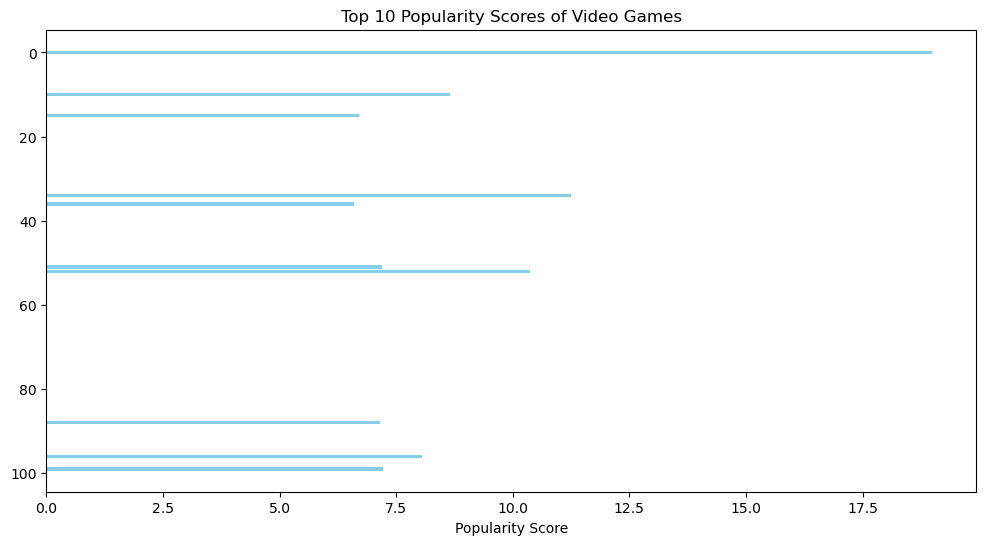

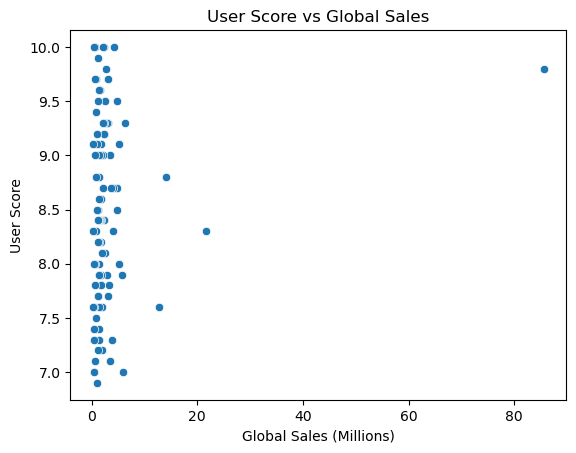

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("videogames.csv")
print("DataFrame Shape:", df.shape)
print(df.head())


df['Popularity_score'] = df['user_score'] * np.log10(df['global_sales_millions'] + 1)

# popularity score
popularitySorted =df.sort_values(by='Popularity_score', ascending=False, inplace=True)
print("Top  Popular Games:\n", df.head(10))
#


rpg = df[df['genre'] == 'RPG']
rpg90 = rpg[rpg['user_score'] > 9.0]
print("RPG Games with User Score > 9.0:\n", rpg90)


#4 
plt.figure(figsize=(12, 6))
topPop10 = df['Popularity_score'].head(10)
plt.barh(topPop10.index, topPop10.values, color='skyblue')
plt.xlabel('Popularity Score')
plt.title('Top 10 Popularity Scores of Video Games')
plt.gca().invert_yaxis()
plt.show()

#5
sns.scatterplot(data=df, y='user_score', x='global_sales_millions')
plt.title('User Score vs Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('User Score')
plt.show()

───────────────────────────
ESERCIZIO 5  –  employees.csv
───────────────────────────
1. Dimensioni del dataset (righe, colonne).  
2. Valori mancanti per colonna.  
3. Imputa NA in department ed education_level usando la moda.  
4. Stipendio medio (salary) per department.  
5. % dipendenti con experience_years > 10 per education_level.  
6. Crea experience_group:  Junior (<3), Mid (3-8), Senior (>8).  
7. • Boxplot salary per experience_group  
   • Grafico a barre del performance_review medio per department


Percentage of Employees with Experience > 10 Years by Education Level:
 education_level
Bachelor       17.886179
High School    40.000000
Master         25.862069
PhD            14.285714
dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_1400\1586970900.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education_level'].fillna(modeEducation, inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_1400\1586970900.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



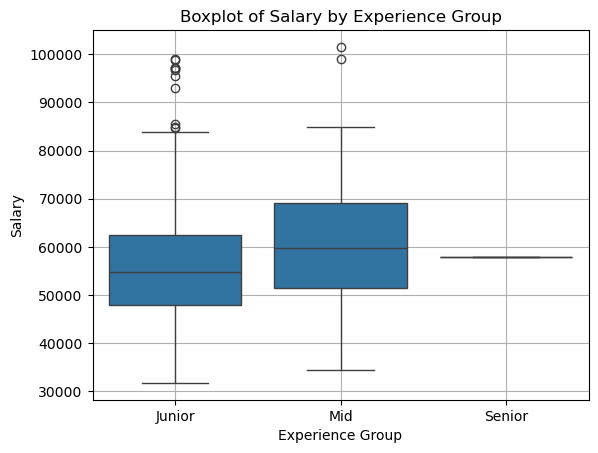

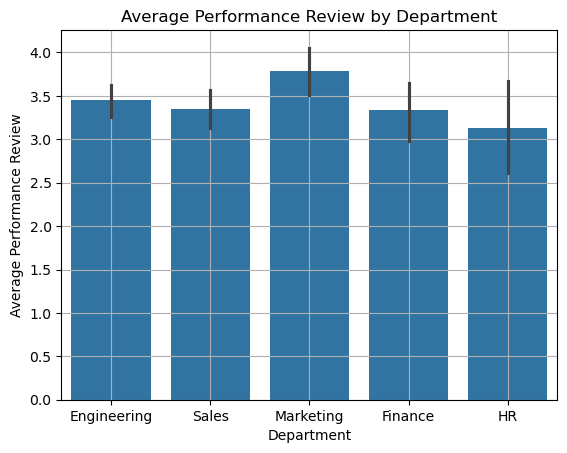

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("employees.csv")
#print("DataFrame Shape:", df.shape)
#print(df.head())

#na
#print("Number of NaN values in each column:\n", df.isna().sum())

#remove na
modeEducation  = df['education_level'].mode()[0]
df['education_level'].fillna(modeEducation, inplace=True)
modeDepartment = df['department'].mode()[0]
df['department'].fillna(modeDepartment, inplace=True)


#avg salary by department
avgSalaryDepartment = df.groupby('department')['salary'].mean()
#print("Average Salary by Department:\n", avgSalaryDepartment)


#% dipendenti con experience_years > 10 per education_level
expYears = df[df['experience_years'] > 2]
#print("Employees with Experience > 10 Years:\n", expYears)
expYearsCount = expYears.groupby('education_level').size()
totalCount = df.groupby('education_level').size()
expYearsPercentage = (expYearsCount / totalCount * 100).fillna(0)
print("Percentage of Employees with Experience > 10 Years by Education Level:\n", expYearsPercentage)

#6. Crea experience_group:  Junior (<3), Mid (3-8), Senior (>8).  
df['experience_group'] = pd.cut(df['experience_years'], bins=[-1, 2, 8, np.inf], labels=['Junior', 'Mid', 'Senior'])


#7. • Boxplot salary per experience_group   • Grafico a barre del performance_review medio per department


sns.boxplot(x='experience_group', y='salary', data=df)
plt.title('Boxplot of Salary by Experience Group')
plt.xlabel('Experience Group')
plt.ylabel('Salary')
plt.grid()
plt.show()


sns.barplot(x='department', y='performance_review', data=df, estimator=np.mean)
plt.title('Average Performance Review by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Review')
plt.grid()

───────────────────────────
ESERCIZIO 6
───────────────────────────
import numpy as np  
x = np.linspace(-5, 5, 100)  
y = 1.5 * x**2 − 2 * x + 3 + np.random.normal(0, 4, 100)

• Definisci f(x) = a x² + b x + c.  
• Usa scipy.optimize.curve_fit per stimare a, b, c.  
• Grafico: scatter di (x, y) + curva quadratica stimata.  
• Calcola MAE e RMSE fra y originali e y predetti.


In [75]:
from scipy.optimize import curve_fit
import numpy as np

np.random.seed(42)

def linear_func(x, a, b):
    return a * x + b

x = np.linspace(-5, 5, 100)


y = 1.5 * x**2 -2 *x +3 + np.random.normal(0,4,100)